In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [23]:
import pandas as pd
import sys, os
sys.path.insert(0, "/home/gstupp/projects/WikidataIntegrator")
from wikidataintegrator import wdi_core, wdi_helpers
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [24]:
prop_df = pd.read_csv("prop_count_labels.csv", index_col=0)
prop_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,Java/1.7.0,Pywikibot/3.0-dev__total,Asparagus/Asparagus 0.1,jgonsior-tree,__match_taxon,images_on_wikidata_not_wikipedia__total,C++ WikiAPI,botanists__total,okhttp/3.4.1__total,axios__total,testing,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,browser__total,microsync,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,Ruby,__find_genus,orcid_bot,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/),other__total,Java/1.7.0__total,Jakarta Commons-HttpClient/3.1,orcidator,resolver__total,__match_taxon__total,Apache-Jena-ARQ,other,Python-httplib2__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),MovieGuide-wikidata/0.1__total,fix_items,python-requests__total,bot_commons,auxiliary_matcher,okhttp/3.4.1,wd_edit_stats__total,automatch,Pywikibot/3.0-dev,-,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *),QueryBot/0.1,beacon__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,...,resolver,beaTunes__total,update_dynamic__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),misc,misc__total,botanists,testing__total,PetScan,thorough_name_match__total,python-requests,taxon_matcher,PetScan__total,"robotic,organic__total",auxiliary_matcher__total,YTCleaner,C++ WikiAPI__total,Java/1.6.0__total,Python-urllib__total,SQID Python Helper,YTCleaner__total,MediaWiki/1.30.0-wmf.*,query__total,https://github.com/bearloga/WikidataQueryServiceR__total,MediaWiki/1.30.0-wmf.*__total,query,Java/1.6.0,new_resolve_authors__total,Jakarta Commons-HttpClient/3.1__total,Magnus labs tools,Java/1.8.0__total,Python-httplib2,wd_edit_stats,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),beacon,Java/1.8.0,__match_or_create_species,coords2json,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *)__total,orcidator__total,translate_items_with_property__total,"robotic,organic",osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),jgonsior-tree__total,taxon_matcher__total,update_dynamic,awarder,-__total,missing_wp_animal_audio
PubMed ID,14939845,15752202,515,3103,14939322,15703193,14933216,0,0,0,0,0,0,12,0,0,0,0,0,49009,0,0,0,0,0,0,10,0,0,0,0,0,78,2,0,2033,0,99,692,0,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,45906,0,0,120,0,0,0,0,3678,0,28,4964,0,0,0,0,199,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,7,0
PMCID,7681907,10052851,58,150,7681848,10052511,7677869,0,0,0,0,0,0,10,0,0,0,0,0,340,0,0,0,0,0,0,11,0,0,0,7,0,74,2,0,2,0,2099,682,0,0,0,0,0,0,7,0,0,0,0,...,6,0,0,0,0,0,0,0,0,1,0,2,0,251,190,0,0,1204,0,0,0,0,1600,0,0,2070,0,0,0,0,179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0
instance of,5372473,21619474,124368,288786,5243926,20053361,88159,402,1912254,1261,0,0,130480,8,0,17663,24,5,0,4776987,0,89282,21318,0,13,0,80457,1380,62042,0,0,0,158908,9622,296,1705984,0,0,5614880,2,0,3230,824,0,196660,785474,0,105520,0,114157,...,0,185891,2353,10552,7584,0,0,0,822,16704,0,1314288,1108,44632,1277327,0,0,323,0,1677430,2,0,0,716,4652,0,260,0,11450,174722,8627,498535,1,10,0,0,27848,0,0,0,0,6,4179,196322,0,208670,7,1,2312978,3
subclass of,3714982,15840791,51449,112441,3660835,15422687,114167,1563,286998,0,10,0,0,1,0,1348,0,0,0,3004434,0,88206,30748,0,0,0,38507,5512,97,0,1,0,10289,10887,0,1644043,0,0,4494721,0,0,1125,0,19,158831,117715,0,105517,0,228154,...,1,111156,1011,21100,7499,0,0,0,0,331,0,756168,540,1718,305663,0,0,44,0,203038,0,0,13629,178,4192,851438,52,0,0,1180,1226,640772,0,0,0,0,23196,0,0,0,0,0,2698,196322,1640,104045,3,1,516525,0
coordinate location,1237332,7305262,35464,213065,1201069,7063722,0,778520,5756,0,0,0,0,0,0,0,0,0,0,1302712,0,17156,4,0,0,0,9539,1818522,1169,0,0,0,137540,3840,0,14298,0,0,615196,0,3459,0,1,0,26,69185,0,0,0,0,...,0,0,0,0,2675,0,0,0,0,104,0,6299,0,598,28475,2201348,0,0,0,6742,0,0,82324,135,3372,134508,68,0,0,22782,1737,4098,0,1,0,0,1348,0,27,0,0,0,799,594,0,0,0,0,313574,0


In [25]:
# biomedical properties
PROPS = ['genomic assembly', 'FlyBase Gene ID', 'found in taxon', 'CAS Registry Number', 'ortholog', 'PMCID', 'chemical formula', 'statement disputed by', 'NCI Thesaurus ID', 
         'anatomical location', 'HGNC gene symbol', 'Rat Genome Database ID', 'UBERON ID', 'has cause', 'Saccharomyces Genome Database ID', 'IEDB Epitope ID', 'Refseq Genome ID', 
         'Guide to Pharmacology Ligand ID', 'biological process', 'ICD-10', 'InChI', 'medical condition treated', 'Drugbank ID', 'genomic end', 'ZFIN Gene ID', 'NDF-RT ID', 
         'encoded by', 'miRBase mature miRNA ID', 'NCBI Locus tag', 'DOI', 'parent taxon', 'UniProt protein ID', 'curator', 'positive diagnostic predictor', 'negative therapeutic predictor',
         'biological variant of', 'HGNC ID', 'genetic association', 'OMIM ID', 'HGVS nomenclature', 'InterPro ID', 'MeSH Code', 'ChemSpider ID', 'RefSeq Protein ID', 'positive prognostic predictor', 
         'PDB structure ID', 'Human Phenotype Ontology ID', 'negative diagnostic predictor', 'EC enzyme number', 'Sequence Ontology ID', 'ChEBI ID', 'ChEMBL ID', 'symptoms', 'determination method', 
         'chromosome', 'miRBase pre-miRNA ID', 'cytogenetic location', 'ICD-10-CM', 'InChIKey', 'molecular function', 'cell component', 'ICD-9-CM', 'rating', 'encodes', 'Wormbase Gene ID', 'ATC code', 
         'isomeric SMILES', 'archive URL', 'GARD rare disease ID', 'RefSeq RNA ID', 'MGI Gene Symbol', 'equivalent class', 'MeSH ID', 'regulates (molecular biology)', 'develops from', 'ICD-9', 
         'negative prognostic predictor', 'UMLS CUI', 'route of administration', 'mirTarBase ID', 'Mouse Genome Informatics ID', 'taxon name', 'Entrez Gene ID', 'strand orientation', 'UNII', 'MonDO ID', 
         'National Cancer Institute ID', 'Ensembl Gene ID', 'Ensembl Transcript ID', 'PubMed ID', 'retrieved', 'Gene Ontology ID', 'positive therapeutic predictor', 'HomoloGene ID', 'Ensembl Protein ID', 
         'genomic start', 'NCBI Taxonomy ID', 'PubChem CID', 'canonical SMILES', 'Orphanet ID', 'subject has role', 'RTECS number', 'Disease Ontology ID', 'KEGG ID', 'CIViC variant ID']
bm_prop_df = prop_df.reindex(PROPS).sort_values("PBB_core fastrun", ascending=False).dropna(axis=0, how="all").dropna(axis=1, how="all").astype(int)

In [26]:
total = bm_prop_df.sum(axis=0)
cols = bm_prop_df.columns[total>1000]
bm_prop_df = bm_prop_df[cols]
bm_prop_df.to_csv("bm_prop_df.csv")
bm_prop_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,Pywikibot/3.0-dev__total,browser__total,other__total,orcidator,resolver__total,__match_taxon__total,Apache-Jena-ARQ,other,sparqlwrapper * (rdflib.github.io/sparqlwrapper),fix_items,python-requests__total,auxiliary_matcher,-,beacon__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,Apache-Jena-ARQ__total,Python-urllib,Apache-HttpClient,fix_items__total,Apache-HttpClient__total,browser,PBB_core fastrun__total,orcid_bot__total,Magnus labs tools__total,__match_or_create_species__total,python-requests,taxon_matcher,"robotic,organic__total",auxiliary_matcher__total,C++ WikiAPI__total,Python-urllib__total,MediaWiki/1.30.0-wmf.*,MediaWiki/1.30.0-wmf.*__total,Magnus labs tools,orcidator__total,taxon_matcher__total,-__total
PubMed ID,14939845,15752202,515,3103,14939322,15703193,14933216,0,49009,10,0,0,0,78,2,2033,99,692,0,7,0,30861,78,0,0,99,0,523,15711819,0,421,0,4,0,45906,0,120,0,3678,4964,199,0,0,7
PMCID,7681907,10052851,58,150,7681848,10052511,7677869,0,340,11,0,7,0,74,2,2,2099,682,0,7,0,2,74,0,0,2110,0,59,10046060,0,486,0,2,0,190,0,1204,0,1600,2070,179,0,0,7
UniProt protein ID,970273,1666935,1039,7226,969218,1659181,968115,0,14435,58,0,0,0,74,6,18,0,0,0,6,244,181,74,0,0,0,0,1759,1651953,0,0,0,0,0,528,0,148,0,262,368,0,0,0,6
Entrez Gene ID,299413,705165,1356,8420,298042,696312,295447,0,8853,135,0,2,0,74,15,2009,0,104,0,6,244,10999,288,0,0,0,0,1371,684245,0,0,0,4,0,433,0,148,0,454,678,0,0,0,6
RefSeq RNA ID,213504,1307474,2,2,213500,367132,212308,0,940342,10,0,0,0,59,2,0,0,0,0,5,0,0,59,0,0,0,0,4,1305434,0,0,0,0,0,940340,0,146,0,1118,1818,0,0,0,5


In [27]:
bm_prop_df_log = bm_prop_df.apply(lambda x:np.log10(x+1))

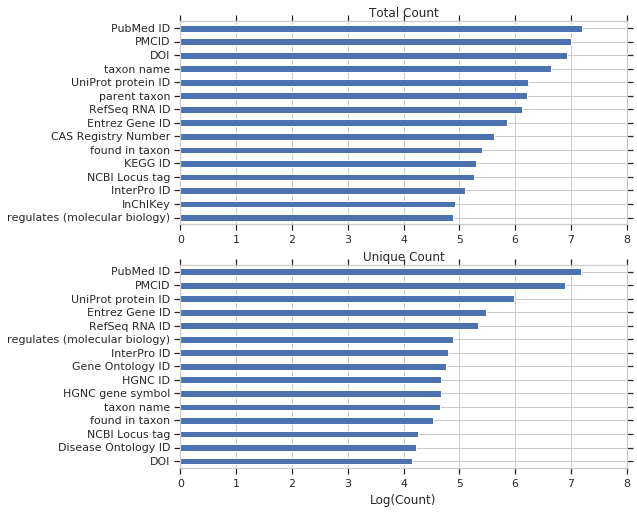

In [28]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df = bm_prop_df_log.sort_values("total")[-15:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = bm_prop_df_log.sort_values("unique")[-15:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")
ax2.set_xlabel("Log(Count)")

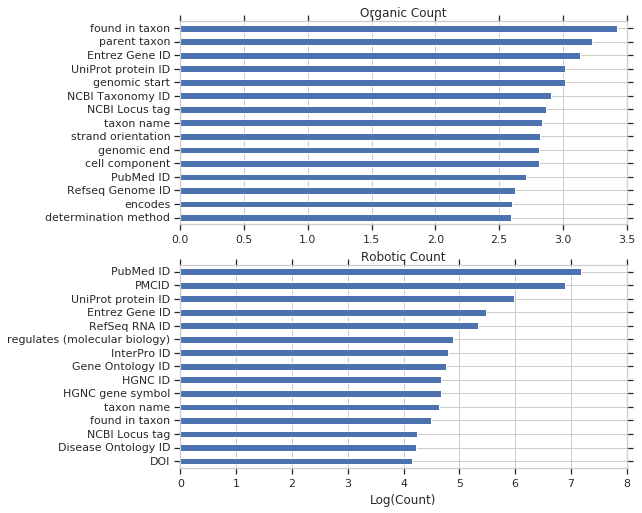

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df = bm_prop_df_log.sort_values("organic")[-15:]
df[['organic']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = bm_prop_df_log.sort_values("robotic")[-15:]
df[['robotic']].plot.barh(ax=ax2, legend=False)
ax.set_title("Organic Count")
ax2.set_title("Robotic Count")
ax2.set_xlabel("Log(Count)")

In [30]:
ua_cols = set(bm_prop_df_log.columns)-{'unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total', 'robotic,organic__total', 'robotic,organic', 'label'}

ua_prop_df = bm_prop_df_log.loc[:,ua_cols]
ua_prop_df_total = ua_prop_df[ua_prop_df.columns[ua_prop_df.columns.str.contains("__total")]]
ua_prop_df_total.columns = ua_prop_df_total.columns.str.replace("__total", "")
ua_prop_df_unique = ua_prop_df[ua_prop_df.columns[~ua_prop_df.columns.str.contains("__total")]]

top_props = set(ua_prop_df_total.sum(axis=1).sort_values(ascending=False)[:10].index) | set(ua_prop_df_unique.sum(axis=1).sort_values(ascending=False)[:10].index)
ua_prop_df_total = ua_prop_df_total[ua_prop_df_total.index.isin(top_props)]
ua_prop_df_unique = ua_prop_df_unique[ua_prop_df_unique.index.isin(top_props)]

top_uas_total = ua_prop_df_total.sum(axis=0).sort_values(ascending=False)[:9].index
top_uas_unique = ua_prop_df_unique.sum(axis=0).sort_values(ascending=False)[:9].index
ua_prop_df_total = ua_prop_df_total.loc[:, top_uas_total]
ua_prop_df_unique = ua_prop_df_unique.loc[:, top_uas_unique]

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


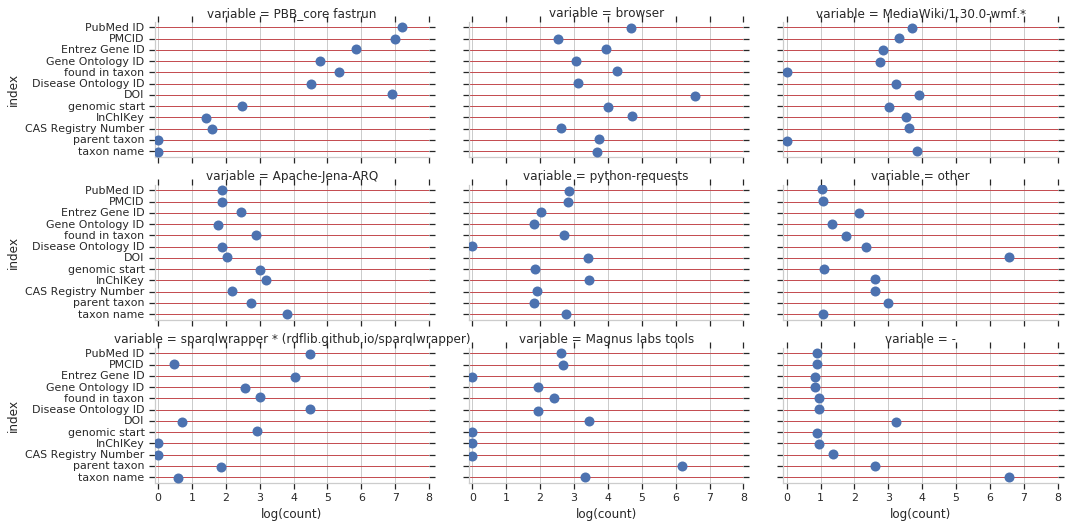

In [35]:
m = ua_prop_df_total.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=3, height=2.5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(-0.1, 8))
for ax in g.axes:
    ax.grid(color='r', linestyle='-', linewidth=1, axis='y')
g.set_xlabels("log(count)")

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


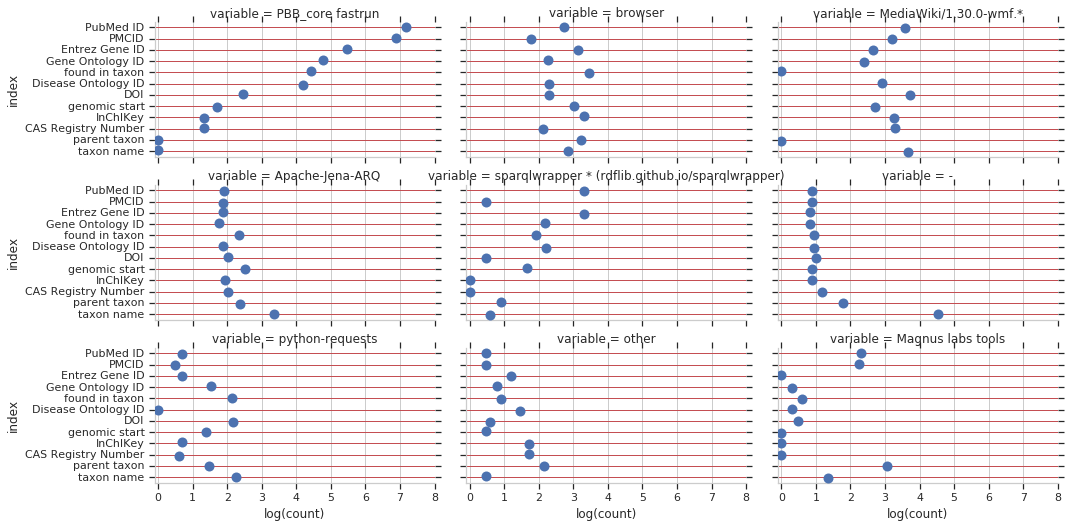

In [36]:
m = ua_prop_df_unique.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=3, height=2.5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(-0.1, 8))
for ax in g.axes:
    ax.grid(color='r', linestyle='-', linewidth=1, axis='y')
g.set_xlabels("log(count)")